In [1]:
import numpy as np; # used for numerical operations
import pandas as pd; # used for  handling data files
import seaborn as sns; # used for visualization
import matplotlib.pyplot as plt; # used for visualization
import lmdiag # to view regression plots

import warnings
warnings.filterwarnings('ignore') # supress unwated warnings like: depricated feature, etc

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # See o/p of multiple statements in ipynb

# Loading Scikit-Learn lib for Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dt_train = pd.read_csv('X:/RG/myworks/innomatics/aus_chapter/kaggle/200305_HousePrices/data/train.csv');
dt_test = pd.read_csv('X:/RG/myworks/innomatics/aus_chapter/kaggle/200305_HousePrices/data/test.csv');

In [3]:
dt_full = pd.concat([dt_train, dt_test], axis=0)
dt_full = dt_full.reindex(dt_train.columns, axis=1)

In [4]:
dt_train.shape; dt_test.shape; dt_full.shape

(1460, 81)

(1459, 80)

(2919, 81)

In [5]:
dt = dt_full
lst_col = dt.columns
lst_dtypes = dt.dtypes

### Handling Missing Values

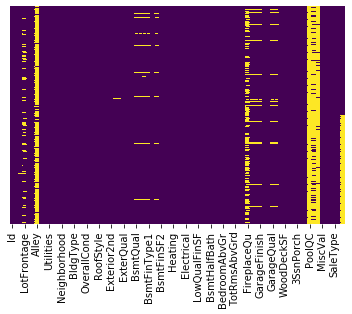

In [6]:
sns.heatmap(dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
dt.shape

# Dropping all columns with more than 40% null values 
for i in dt.columns:
    if (dt[i].isnull().sum() > len(dt)*0.4 and i!='SalePrice'):
        dt.drop([i], axis=1, inplace=True)

dt.shape

(2919, 81)

(2919, 76)

In [8]:
for i in dt.columns:
    if (dt[i].isnull().sum() > len(dt)*0.01):
        print(i, dt[i].isnull().sum())

LotFrontage 486
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinType2 80
GarageType 157
GarageYrBlt 159
GarageFinish 159
GarageQual 159
GarageCond 159
SalePrice 1459


In [9]:
# Repalcing null values with either mean or mode all col values

for i in dt.columns:
    if (dt[i].dtype == 'int64' or dt[i].dtype == 'float64' and i!='SalePrice'):
        dt[i] = dt[i].fillna(dt[i].mean())
    elif (dt[i].dtype == 'object' and i!='SalePrice'):
        dt[i] = dt[i].fillna(dt[i].mode()[0])

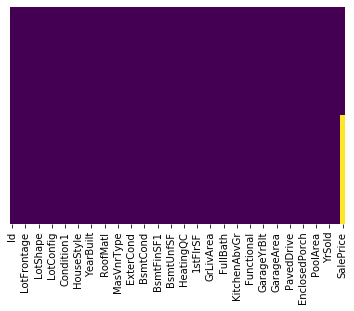

In [10]:
sns.heatmap(dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Convert Categorical into Numerical Columns

In [11]:
tdt = dt

In [12]:
cnt = 0; ucnt=0
for i in dt.columns:
    if (dt[i].dtype == 'object' and i!='SalePrice'):
        cnt = cnt + 1
        ucnt = ucnt + len(dt[i].value_counts()) - 1
    elif (dt[i].dtype != 'object' and i!='SalePrice'):
        cnt = cnt + 1
        ucnt = ucnt + 1
cnt + 1
ucnt + 1

76

234

In [13]:
tdt.shape

# Convert all Categorical columns into Numerical columns using pd.get_dummies function
for i in tdt.columns:
    if (tdt[i].dtype == 'object' and i!='SalePrice'):
        df_dummy = pd.get_dummies(tdt[i], prefix=i, drop_first=True)
        tdt = pd.concat([tdt, df_dummy], axis=1)
        tdt.drop([i], axis=1, inplace=True)

tdt.shape

(2919, 76)

(2919, 234)

In [14]:
tdt = tdt.loc[:,~tdt.columns.duplicated()]

In [15]:
tdt.shape

(2919, 234)

In [32]:
tdt[['Id','SalePrice']][1455:1465]

,Id,SalePrice
1455,1456,175000.0
1456,1457,210000.0
1457,1458,266500.0
1458,1459,142125.0
1459,1460,147500.0
0,1461,NaN
1,1462,NaN
2,1463,NaN
3,1464,NaN
4,1465,NaN


### Split into Train & Test Data

In [36]:
train = tdt[:1460]
train[['Id','SalePrice']].tail()

test = tdt[1460:]
test[['Id','SalePrice']].head()

,Id,SalePrice
1455,1456,175000.0
1456,1457,210000.0
1457,1458,266500.0
1458,1459,142125.0
1459,1460,147500.0


,Id,SalePrice
0,1461,NaN
1,1462,NaN
2,1463,NaN
3,1464,NaN
4,1465,NaN


In [50]:
X = train.drop(['SalePrice'], axis=1)
#Y = pd.DataFrame(train['SalePrice'])
Y = train.SalePrice

X.shape
type(X)
Y.shape
type(Y)

(1460, 233)

pandas.core.frame.DataFrame

(1460,)

pandas.core.series.Series

In [63]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [64]:
import xgboost

In [70]:
classifier = xgboost.XGBRegressor()
classifier.fit(X,Y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [68]:
import pickle
filename = 'HousePrices.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [71]:
test1 = test.drop(['SalePrice'], axis=1)

In [72]:
test_pred = classifier.predict(test1)

In [73]:
test_pred

array([125917.61, 156434.25, 185003.94, ..., 172659.3 , 109090.9 ,
       234021.58], dtype=float32)

In [74]:
# Create sample submission file
df_pred = pd.DataFrame(test_pred)

df_sub = pd.read_csv('X:/RG/myworks/innomatics/aus_chapter/kaggle/200305_HousePrices/data/sample_submission.csv')

df_final = pd.concat([df_sub['Id'], df_pred], axis=1)

df_final.columns=['Id', 'SalePrice']

df_final.to_csv('X:/RG/myworks/innomatics/aus_chapter/kaggle/200305_HousePrices/data/final_submission.csv', index=False)